In [1]:
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets as ds
from torchvision.transforms import ToTensor as toTvTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt
import numpy

import net_tools as nt


In [2]:
train_data = ds.FashionMNIST(
    root = "../dat/",
    train = True, # get training data
    download = True, # download data if it doesn't exist on disk
    transform = toTvTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

test_data = ds.FashionMNIST(
    root = "../dat/",
    train=False, # get test data
    download=True,
    transform=toTvTensor()
)

In [3]:
DEVICE = "cpu"
classes = ds.FashionMNIST.classes

In [4]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
# Setup the batch size hyperparameter

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(
    train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

In [5]:
# Create a model with non-linear and linear layer

net = nt.ConvNet(
    1,
    10,
    len(classes)
)
net.to(DEVICE)

ConvNet(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [6]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [22]:
net = nt.ConvNet(
    1,
    10,
    len(classes)
)
net.to(DEVICE)

import tqdm

EPOCHS = 5
list_train_acc = []
list_test_acc = []

In [26]:
# Testing loop
for i in tqdm.tqdm(range(EPOCHS)):
   print(f"epoch: {i+1}\n--------------------")
   train_acc = nt.train(
       net,
       train_dataloader,
       nn.CrossEntropyLoss(),
       torch.optim.SGD(net.parameters(), lr = 0.1),
       nt.accuracy_fn,
       DEVICE
    )
   
   if (i + 1)%1 == 0: 
      test_acc = nt.test(
         test_dataloader,
         net,
         nn.CrossEntropyLoss(),
         nt.accuracy_fn,
         DEVICE
      )
      print("test data logged")
   
   list_train_acc.append(train_acc)
   list_test_acc.append(test_acc)

  0%|          | 0/5 [00:00<?, ?it/s]

epoch: 1
--------------------
Train loss: 0.26254 | Train accuracy: 90.29%


 20%|██        | 1/5 [00:28<01:53, 28.32s/it]

Test loss: 0.29124 | Test accuracy: 89.27%

test data logged
epoch: 2
--------------------
Train loss: 0.25514 | Train accuracy: 90.72%


 40%|████      | 2/5 [00:57<01:25, 28.56s/it]

Test loss: 0.29446 | Test accuracy: 89.49%

test data logged
epoch: 3
--------------------
Train loss: 0.24825 | Train accuracy: 91.01%


 60%|██████    | 3/5 [01:24<00:56, 28.26s/it]

Test loss: 0.29035 | Test accuracy: 89.16%

test data logged
epoch: 4
--------------------
Train loss: 0.24621 | Train accuracy: 91.02%


 80%|████████  | 4/5 [01:53<00:28, 28.33s/it]

Test loss: 0.27169 | Test accuracy: 89.98%

test data logged
epoch: 5
--------------------
Train loss: 0.24068 | Train accuracy: 91.11%


100%|██████████| 5/5 [02:20<00:00, 28.10s/it]

Test loss: 0.28883 | Test accuracy: 90.04%

test data logged


In [24]:
list_train_acc, list_test_acc

([78.545, 87.79333333333334, 88.97, 89.65166666666667, 90.08666666666667],
 [86.00239616613419,
  87.55990415335464,
  89.08746006389777,
  88.87779552715655,
  89.66653354632588])

In [9]:
import numpy as np

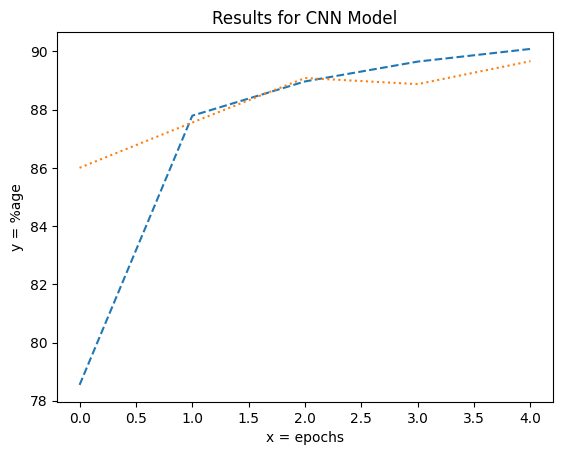

In [25]:
plt.plot(np.array(list_train_acc), ls='--')
plt.plot(np.array(list_test_acc), ls=':')
plt.title("Results for CNN Model")
plt.xlabel("x = epochs")
plt.ylabel("y = %age")
plt.show()